In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=feb3e748e952fdd2dc73981cd8ad45bf0c0a1ff8d3ca3f32c68aa6d75d201c9d
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pyspark.sql.functions as F
from pyspark.sql.types import FloatType
import matplotlib.pyplot as plt

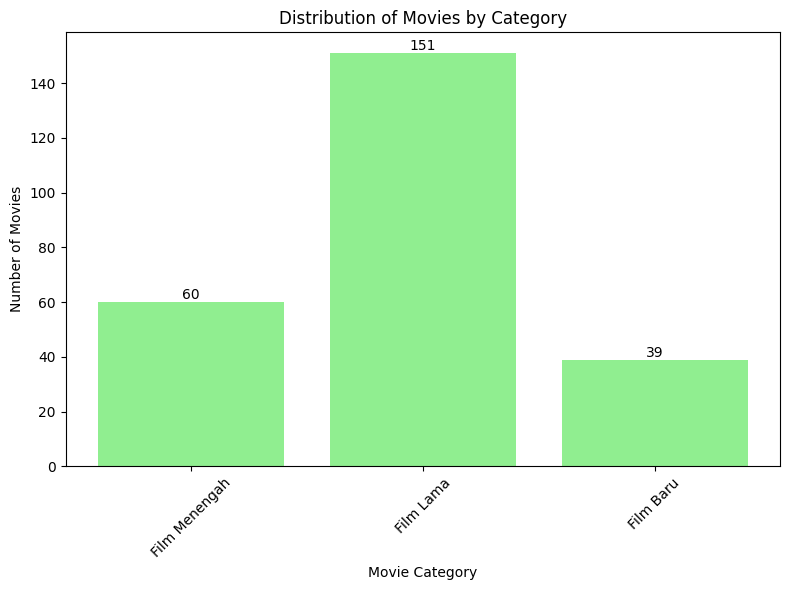

In [5]:
# Inisialisasi sesi Spark
spark = SparkSession.builder \
    .appName("movies") \
    .getOrCreate()

# Membaca data dari CSV ke DataFrame
mov_df = spark.read.csv("/content/drive/MyDrive/Dataset/Movies.csv", header=True)

# Membuat view sementara untuk DataFrame
mov_df.createOrReplaceTempView("Movies")

# Menjalankan query untuk menghitung rata-rata rating per tahun
analysis_results_df = spark.sql("""
    SELECT
        CASE
            WHEN Released_year BETWEEN 1900 AND 1999 THEN 'Film Lama'
            WHEN Released_year BETWEEN 2000 AND 2012 THEN 'Film Menengah'
            WHEN Released_year BETWEEN 2013 AND 2024 THEN 'Film Baru'
        END AS Movie_Category,
        COUNT(*) AS Movie_Count
    FROM
        Movies
    GROUP BY
        Movie_Category
""")

# Collecting data for visualization
categories = analysis_results_df.select("Movie_Category").rdd.flatMap(lambda x: x).collect()
counts = analysis_results_df.select("Movie_Count").rdd.flatMap(lambda x: x).collect()

# Plotting the distribution of movies across categories
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color='lightgreen')
plt.title('Distribution of Movies by Category')
plt.xlabel('Movie Category')
plt.ylabel('Number of Movies')

# Adding labels on top of each bar
for i in range(len(categories)):
    plt.text(categories[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('movie_category_distribution.png')
plt.show()

# Menutup sesi Spark
spark.stop()